In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comparison-of-north-american-ski-resorts/north_american_ski_resort_data.csv


In [2]:
df=pd.read_csv('../input/comparison-of-north-american-ski-resorts/north_american_ski_resort_data.csv')

In [3]:
df.head()

,Resort,City,State,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Skiable acreage,Total trails,Total lifts,Avg annual snowfall (in),Lift ticket (USD)
0,Afton Alps,Afton,Minnesota,700,350,350,300,50,22,60,28
1,Pomerelle Mountain Resort,Albion,Idaho,9000,8000,1000,500,24,2,500,45
2,Sandia Peak,Albuquerque,New Mexico,10378,8678,1700,200,39,5,100,55
3,Bear Creek Mountain Resort,Allentown,Pennsylvania,1100,590,510,86,21,7,30,60
4,Grand Targhee Resort,Alta,Wyoming,10121,7851,2270,2602,99,5,500,98


## Check if Normally Distributed

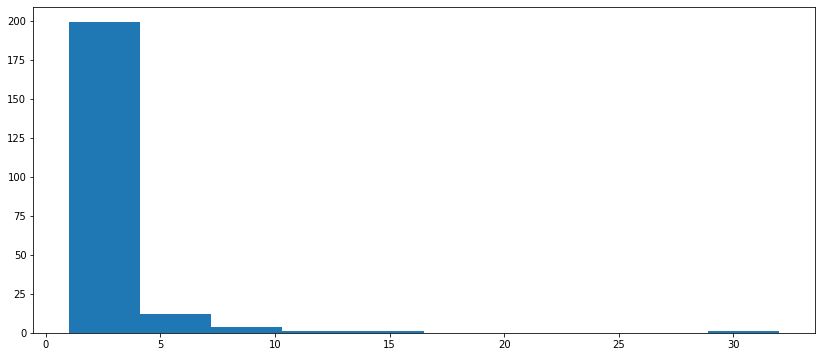

In [4]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
df1=df['Skiable acreage'].value_counts()
pyplot.hist(df1)
pyplot.show()

In [5]:
from scipy.stats import shapiro
DataToTest=df['Skiable acreage']
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.60, p=0.00000000000000000000
Not a Normal distribution


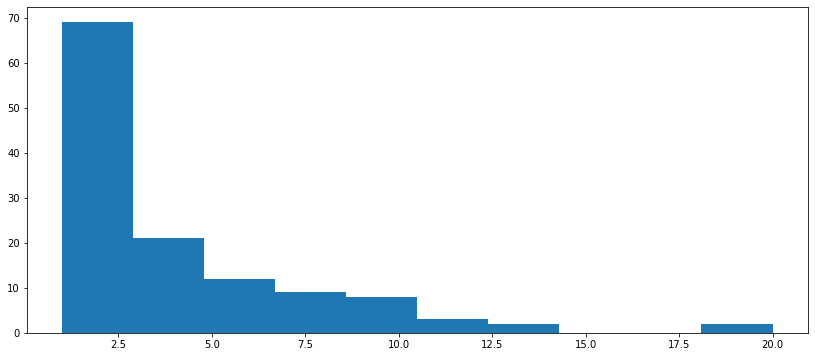

In [6]:
import matplotlib
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(14,6))
df2=df['Total trails'].value_counts()
pyplot.hist(df2)
pyplot.show()

In [7]:
from scipy.stats import shapiro
DataToTest = df['Total trails']
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.76, p=0.000000000000000000000000186206
Not a normal distribution


In [8]:
from numpy.random import randn
DataToTest1 = randn(100)

In [9]:
stat, p = shapiro(DataToTest1)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.680177450180053710937500000000
Normal distribution


### K^2 NORMALITY TEST

In [10]:
df3=df['Base elevation (ft)'].value_counts()

In [11]:
from scipy.stats import normaltest
DataToTest=df3
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.27, p=0.00000000000000000000
Not a Normal distribution


In [12]:
DataToTest=df2
stat, p = shapiro(DataToTest)
print('stat=%.2f, p=%.20f' %(stat,p))

if p>0.05:
    print('Normal distribution')
else:
    print('Not a Normal distribution')

stat=0.74, p=0.00000000000010668766
Not a Normal distribution


### CORRELATION TEST : PEARSON AND SPEARMAN'S RANK CORRELATION

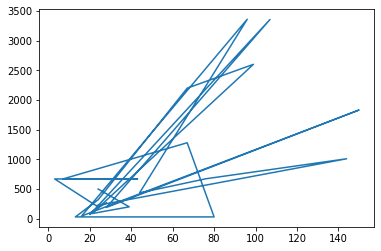

In [13]:
from matplotlib import pyplot
test1=df[1:25]['Total trails']
test2=df[1:25]['Skiable acreage']
pyplot.plot(test1 , test2)
pyplot.show()

##### Pearson's Rank Correlation

In [14]:
from scipy.stats import pearsonr
stat, p = pearsonr(test1,test2)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')


stat=0.672, p=0.000324
Dependent samples


#### Spearmans Rank Correlation

In [15]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(test1,test2)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')

stat=0.635, p=0.000854
Dependent samples


In [16]:
df.corr(method='pearson')

,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Skiable acreage,Total trails,Total lifts,Avg annual snowfall (in),Lift ticket (USD)
Peak elevation (ft),1.000000,0.967615,0.677849,0.534935,0.506504,0.276583,0.633354,0.532656
Base elevation (ft),0.967615,1.000000,0.482740,0.398213,0.350634,0.157162,0.551150,0.408640
Vertical drop (ft),0.677849,0.482740,1.000000,0.729749,0.775489,0.536442,0.607973,0.702719
Skiable acreage,0.534935,0.398213,0.729749,1.000000,0.796667,0.585284,0.577356,0.551533
Total trails,0.506504,0.350634,0.775489,0.796667,1.000000,0.745050,0.490471,0.723576
Total lifts,0.276583,0.157162,0.536442,0.585284,0.745050,1.000000,0.256436,0.722331
Avg annual snowfall (in),0.633354,0.551150,0.607973,0.577356,0.490471,0.256436,1.000000,0.419949
Lift ticket (USD),0.532656,0.408640,0.702719,0.551533,0.723576,0.722331,0.419949,1.000000


#### CHI squared test

In [17]:
contingency_data=pd.crosstab(df['State'],df['Skiable acreage'],margins=False)
contingency_data

Skiable acreage,2,6,7,8,9,10,12,14,15,16,...,4200,4270,4318,4800,5289,5800,6400,7300,8171,8464
State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alaska,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alberta,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
British Columbia,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
California,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Colorado,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
Connecticut,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Idaho,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' %(stat,p))

if p>0.05:
    print('Independent categories')
else:
    print('dependent categories')

stat=9674.903, p=0.006
dependent categories


In [19]:
contingency_data1=pd.crosstab(df['City'],df['Total trails'],margins=False)
contingency_data1

Total trails,1,2,3,4,5,6,7,8,9,10,...,154,155,165,167,187,195,200,277,317,348
City,,,,,,,,,,,,,,,,,,,,,
Afton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albuquerque,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allentown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alta,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wolfeboro,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Worcester,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wrightwood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_data1)
print('stat=%.3f, p=%.3f' %(stat,p))

if p>0.05:
    print('Independent categories')
else:
    print('dependent categories')

stat=47705.792, p=1.000
Independent categories


### T test

In [21]:
df['Lift ticket (USD)'].mean()

63.93073593073593

In [22]:
import scipy
scipy.stats.ttest_1samp(df['Lift ticket (USD)'],64)

Ttest_1sampResult(statistic=-0.042456699194667546, pvalue=0.9661530118551469)

In [23]:
df.head()

,Resort,City,State,Peak elevation (ft),Base elevation (ft),Vertical drop (ft),Skiable acreage,Total trails,Total lifts,Avg annual snowfall (in),Lift ticket (USD)
0,Afton Alps,Afton,Minnesota,700,350,350,300,50,22,60,28
1,Pomerelle Mountain Resort,Albion,Idaho,9000,8000,1000,500,24,2,500,45
2,Sandia Peak,Albuquerque,New Mexico,10378,8678,1700,200,39,5,100,55
3,Bear Creek Mountain Resort,Allentown,Pennsylvania,1100,590,510,86,21,7,30,60
4,Grand Targhee Resort,Alta,Wyoming,10121,7851,2270,2602,99,5,500,98


In [24]:
import scipy
scipy.stats.ttest_rel(df['Peak elevation (ft)'],df['Base elevation (ft)'])

Ttest_relResult(statistic=25.52081158230152, pvalue=3.2602741503312817e-90)